#### **This Notebook can be used to Manually Inspect the effects of different cleaning parameters.**

Import Libraries

In [4]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *

Read the spectral data

In [5]:
df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")

In [6]:
df = df[(df['WaveNumber'] >= 400) & (df['WaveNumber'] <= 1800)]

In [7]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
293,201210-1-00,293,400.22778,1765.6628,201210-1,Normal
294,201210-1-00,294,400.91116,1774.7809,201210-1,Normal
295,201210-1-00,295,401.59454,1769.0302,201210-1,Normal
296,201210-1-00,296,402.27789,1756.4220,201210-1,Normal
297,201210-1-00,297,402.96127,1758.8690,201210-1,Normal
...,...,...,...,...,...,...
8023277,210526-3-09,2337,1797.03870,1617.3926,210526-3,Hyperglycemia
8023278,210526-3-09,2338,1797.72200,1633.0911,210526-3,Hyperglycemia
8023279,210526-3-09,2339,1798.40550,1633.3076,210526-3,Hyperglycemia
8023280,210526-3-09,2340,1799.08890,1641.8665,210526-3,Hyperglycemia


#### **Select the chosen cleaning parameters then run the functions**

Choose the Parameters

In [25]:
df['SpecID'].drop_duplicates()

293        201210-1-00
2928       201210-1-01
5563       201210-1-02
8198       201210-1-03
10833      201210-1-04
              ...     
8010693    210526-3-05
8013328    210526-3-06
8015963    210526-3-07
8018598    210526-3-08
8021233    210526-3-09
Name: SpecID, Length: 3045, dtype: object

In [8]:
print(df['SpecID'].unique())

['201210-1-00' '201210-1-01' '201210-1-02' ... '210526-3-07' '210526-3-08'
 '210526-3-09']


In [22]:
# despike_ma = 19
# despike_threshold = 5
# lam = 10**8
# p = 0.049
# window_size = 11
# poly_order = 2

lam = 10**7
p = 0.2
window_size = 51
poly_order = 5

def plot_cleaning(df, spec_ids, lam, p, window_size, poly_order):
    for spec_id in spec_ids:

        print(f'Spectra: {spec_id}')
        sample = df[df['SpecID'] == spec_id]

        # Creating a figure with 2 subplots in one row
        fig, axes = plt.subplots(1, 2, figsize=(18, 6))

        # Plot 1: Baseline Corrected
        sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(lambda x: asls_baseline_correction(x, lam=lam, p=p))

        sns.lineplot(x="WaveNumber", y="Absorbance", data=sample, ax=axes[0])
        sns.lineplot(x="WaveNumber", y="Baseline", data=sample, ax=axes[0])
        axes[0].set_title(f'Absorbance with Baseline')

        # Plot 2: Baseline Corrected and Smoothed
        sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
        sample['Smoothed_Absorbance'] = sample.groupby('SpecID')['Baseline_Corrected_Absorbance'].transform(lambda x: savgol_filter(x, window_size, poly_order, deriv=0))
        sns.lineplot(x="WaveNumber", y="Smoothed_Absorbance", data=sample, ax=axes[1])
        axes[1].set_title(f'Corrected and Smoothed Absorbance')

        # Display the plots
        plt.tight_layout()
        plt.show()

Spectra: 201210-1-00


/tmp/ipykernel_14351/2404576315.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(
/tmp/ipykernel_14351/2404576315.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
/tmp/ipykernel_14351/2404576315.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


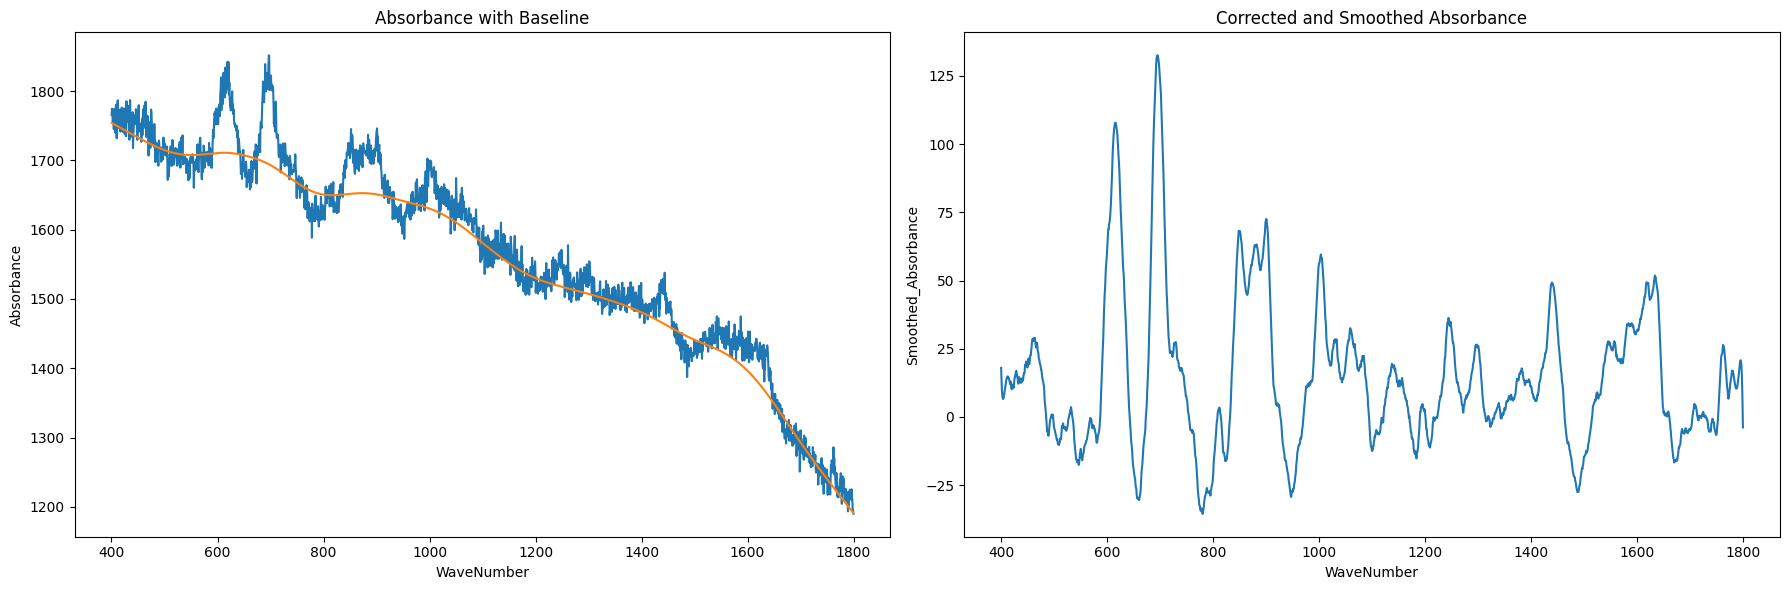

Spectra: 201210-1-10


/tmp/ipykernel_14351/2404576315.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(
/tmp/ipykernel_14351/2404576315.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
/tmp/ipykernel_14351/2404576315.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


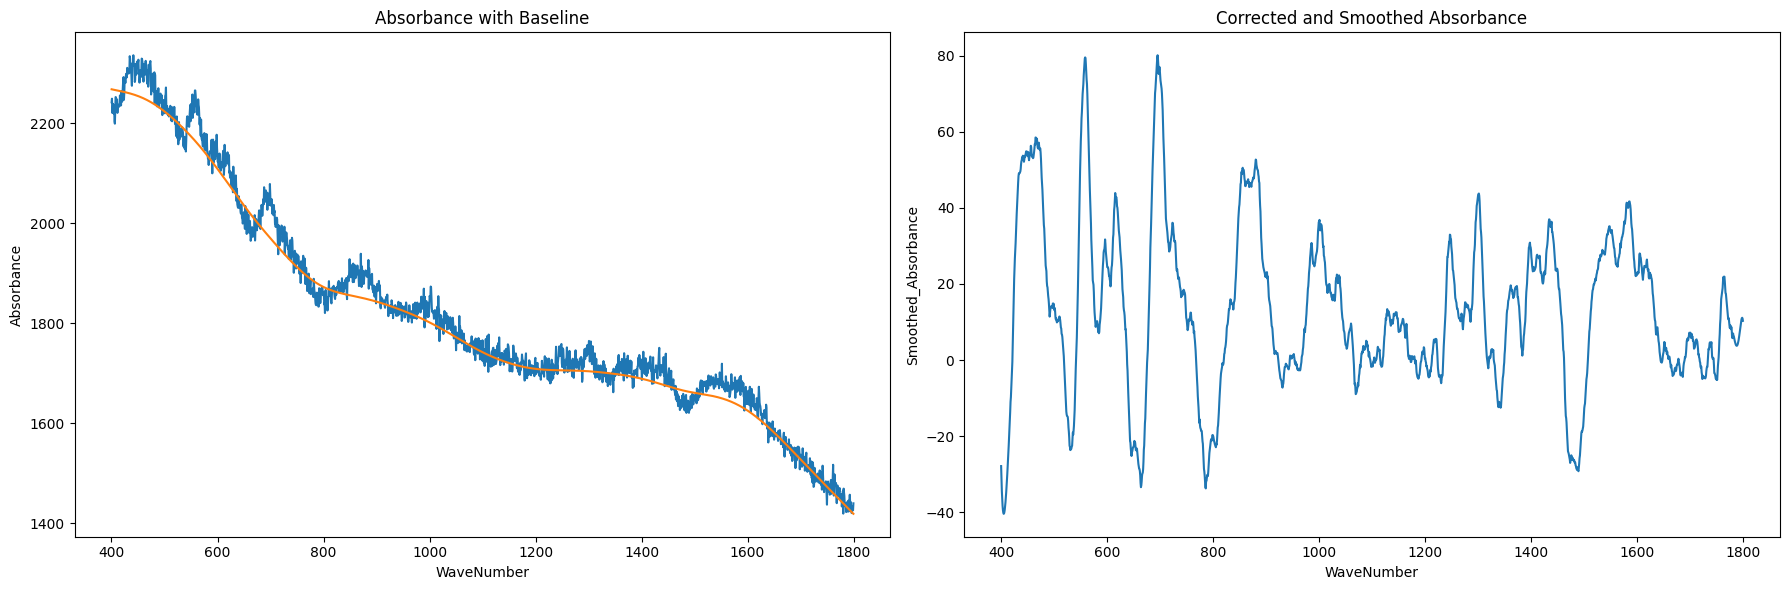

Spectra: 201210-1-04


/tmp/ipykernel_14351/2404576315.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(
/tmp/ipykernel_14351/2404576315.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
/tmp/ipykernel_14351/2404576315.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


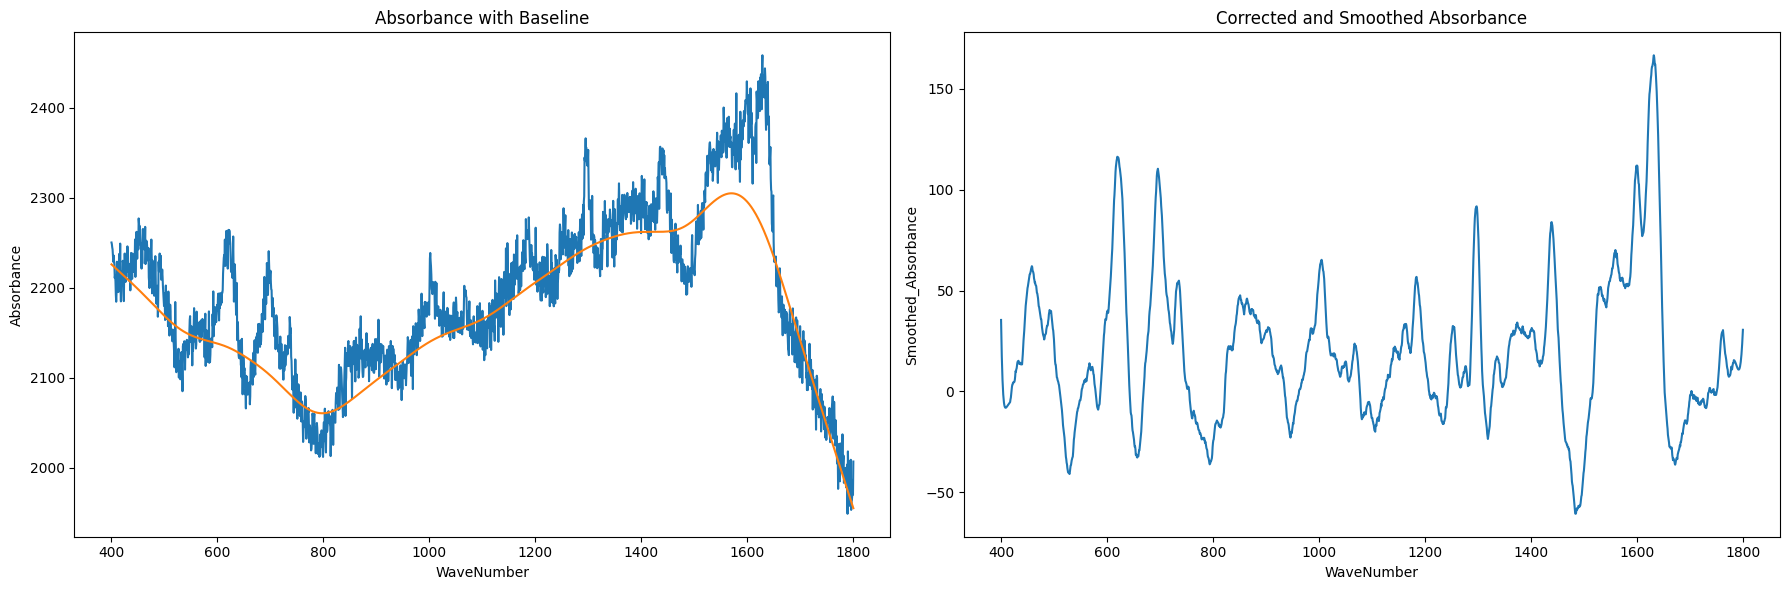

In [27]:
spec_ids = ['201210-1-00', '201210-1-10', '201210-1-04']

plot_cleaning(df, spec_ids=spec_ids, lam=lam, p=p, window_size=window_size, poly_order=poly_order)